In [0]:
# Authors:
#     1. PALLAVI DASARAPU - PXD210008
#     2. TIRTH MEHTA - TDM210001
#     3. ANKIT SAHU - AXS210226

In [0]:
pip install tensorflow

Python interpreter will be restarted.
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for jax: filename=jax-0.4.8-py3-none-any.whl size=1439694 sha256=e181c21c8ddf51a729fe1b83e357c8c942e95879a7f893bd462c71cdab0804b3
  Stored in directory: /root/.cache/pip/wheels/05/94/dc/81042da9bced43ff430bc02043d213d9e4b210b584c39e31c1
Successfully built jax
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Not uninstalling numpy at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-82b52cb7-4696-46bf-a377-eba18a529b8e
    Can't uninstall 'numpy'. No files were found to uninstall.
  Attempting uninstall: MarkupSafe
    Found existing in

In [0]:
pip install keras

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install yfinance

Python interpreter will be restarted.
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Not uninstalling pytz at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-82b52cb7-4696-46bf-a377-eba18a529b8e
    Can't uninstall 'pytz'. No files were found to uninstall.
Python interpreter will be restarted.


In [0]:
pip install pandas_datareader

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
from keras.layers import Dense,LSTM
from keras import backend as bknd
from keras.models import Sequential
from keras import metrics as mtrs
import numpy as np
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [0]:
import yfinance as yfin
from pandas_datareader import data as pdr
yfin.pdr_override()

In [0]:
strt_dt = '2012-01-01'
ed_dt = '2023-03-31'

In [0]:
tsldatadf = pdr.get_data_yahoo('TSLA', start= strt_dt, end= ed_dt)
print(type(tsldatadf))

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>


In [0]:
tsldatadf['Date'] = tsldatadf.index
tsl_data_df = spark.createDataFrame(tsldatadf)
print(type(tsl_data_df))

<class 'pyspark.sql.dataframe.DataFrame'>


In [0]:
tsldatadf.display()

Open,High,Low,Close,Adj Close,Volume,Date
1.929332971572876,1.9666670560836792,1.8433330059051514,1.871999979019165,1.871999979019165,13921500,2012-01-03T00:00:00.000+0000
1.880666971206665,1.9113329648971558,1.8333330154418945,1.8473329544067383,1.8473329544067383,9451500,2012-01-04T00:00:00.000+0000
1.8506669998168945,1.8619999885559082,1.7899999618530273,1.8079999685287476,1.8079999685287476,15082500,2012-01-05T00:00:00.000+0000
1.8133330345153809,1.852666974067688,1.7606669664382935,1.7940000295639038,1.7940000295639038,14794500,2012-01-06T00:00:00.000+0000
1.7999999523162842,1.8326669931411743,1.7413330078125,1.8166669607162476,1.8166669607162476,13455000,2012-01-09T00:00:00.000+0000
1.829332947731018,1.8506669998168945,1.8166669607162476,1.841333031654358,1.841333031654358,10077000,2012-01-10T00:00:00.000+0000
1.841333031654358,1.8919999599456787,1.8200000524520874,1.8819999694824219,1.8819999694824219,10084500,2012-01-11T00:00:00.000+0000
1.8986669778823853,1.9079999923706055,1.8539999723434448,1.8833329677581787,1.8833329677581787,10939500,2012-01-12T00:00:00.000+0000
1.8933329582214355,1.899999976158142,1.5093330144882202,1.519333004951477,1.519333004951477,82506000,2012-01-13T00:00:00.000+0000
1.7746670246124268,1.8226670026779175,1.7606669664382935,1.773332953453064,1.773332953453064,69774000,2012-01-17T00:00:00.000+0000


In [0]:
datetmp = tsl_data_df.select('Date')
clostmp = tsl_data_df.select('Close')

Out[8]: [<matplotlib.lines.Line2D at 0x7f6778c0cbb0>]

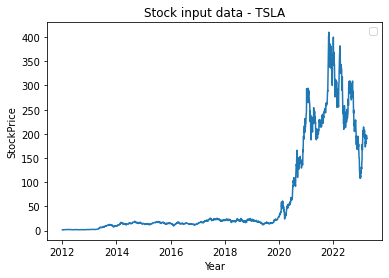

In [0]:
plt.title('Stock input data - TSLA')
x = datetmp.collect()
y = clostmp.collect()
plt.legend(['Stock Price Data - TSLA'])
plt.ylabel('StockPrice')
plt.xlabel('Year')
plt.plot(x,y)

In [0]:
# data from close
closdatadf = clostmp.collect()

In [0]:
# scaling (0-1)
from sklearn.preprocessing import MinMaxScaler

In [0]:
mnmxscl = MinMaxScaler(feature_range=(0,1))
closscaled=mnmxscl.fit_transform(closdatadf)

In [0]:
#creating training data
tmp = len(closdatadf)
trndatasize=int(tmp*0.8)
trndatasize

Out[12]: 2263

In [0]:
trndf=closscaled[0:trndatasize]
x_trnvls=[]
y_trnvls=[]
hops=50
diff = trndatasize - hops
for xx in range(diff):
    x_trnvls.append(trndf[xx : xx+hops, 0])
    y_trnvls.append(trndf[xx+hops, 0])

In [0]:
# Converting x_trnvls and y_trnvls values to numpy arrays
xtr = np.array(x_trnvls)
ytr = np.array(y_trnvls)
x_trnvls,y_trnvls = xtr, ytr
x_trnvls.shape
 

Out[14]: (2213, 50)

In [0]:
#Reshaping data
x_trnvls = np.reshape(x_trnvls,(diff,hops,1))
x_trnvls.shape

Out[15]: (2213, 50, 1)

In [0]:
valLstm = Sequential()
valLstm.add(LSTM(units=50, input_shape=(hops,1), return_sequences=True))
valLstm.add(LSTM(units=50,return_sequences=False))

In [0]:
dns = [10, 25]
valLstm.add(Dense(dns[1]))
valLstm.add(Dense(dns[0]))

In [0]:
def rtmnsqr(act, prd):
    bcksqr = bknd.square(prd - act)
    bckmean = bknd.mean(bcksqr, axis=-1)
    return bknd.sqrt(bckmean)

In [0]:
msqerr = mtrs.mean_squared_error
mabserr = mtrs.mean_absolute_error
mabsprcnt = mtrs.mean_absolute_percentage_error
valLstm.compile(optimizer='adam', metrics=[msqerr, mabserr, mabsprcnt, rtmnsqr], loss='mean_squared_error')

In [0]:
btchsz = [1,5,10]
epo = 50
btch1 = valLstm.fit(x_trnvls, y_trnvls, batch_size=btchsz[0], epochs=epo)
btch2 = valLstm.fit(x_trnvls, y_trnvls, batch_size=btchsz[1], epochs=epo)
btch3 = valLstm.fit(x_trnvls, y_trnvls, batch_size=btchsz[2], epochs=epo)

Epoch 1/50
 129/2213 [>.............................] - ETA: 1:05 - loss: 0.0038 - mean_squared_error: 0.0038 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 279.7076 - rtmnsqr: 0.0305

*** WARNING: max output size exceeded, skipping output. ***

222/222 [==============================] - 11s 50ms/step - loss: 2.3542e-05 - mean_squared_error: 2.3542e-05 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 16.9082 - rtmnsqr: 0.0024


In [0]:
#Testing data set
print(hops)
testing_data = closscaled[diff:]
x_tstvls = []
y_tstvls = closdatadf[trndatasize:]
val = len(testing_data)-hops
for x in range(val):
    x_tstvls.append(testing_data[x:x+hops,0])

50


In [0]:
# Converting x_trnvls and y_trnvls into numpy arrays
x_tstvls = np.array(x_tstvls)
x_tstvls.shape

Out[22]: (566, 50)

In [0]:
#Reshaping data
x_tstvls = np.reshape(x_tstvls,(val,hops,1))

In [0]:
#predicting values
prdvals = valLstm.predict(x_tstvls)
prdvals = mnmxscl.inverse_transform(prdvals)

18/18 [==============================] - 1s 16ms/step


In [0]:
def rtmnsqr_func(m,n):
    temp = (m-n)**2
    temp = np.mean(temp)
    temp = np.sqrt(temp)
    return temp

In [0]:
x = np.mean((prdvals-y_tstvls)**2)
print(x)

243.038808290494


In [0]:
print(np.mean(mtrs.mean_absolute_percentage_error(y_tstvls, prdvals)))

3.861875


In [0]:
rtmnsqr_val = rtmnsqr_func(prdvals, y_tstvls)
print("Root mean square Error for the prediction:", rtmnsqr_val)

Root mean square Error for the prediction: 15.58970199492261


Out[55]: [<matplotlib.lines.Line2D at 0x7f6741d26460>,

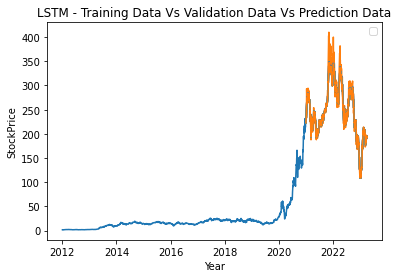

In [0]:
yrval = datetmp.collect()
closval = clostmp.collect()
plt.title('LSTM - Training Data Vs Validation Data Vs Prediction Data')
plt.legend(['Training','Validation','Prediction'])
plt.ylabel('StockPrice')
plt.xlabel('Year')
plt.plot(yrval[:trndatasize],closval[:trndatasize])
plt.plot(yrval[trndatasize:],closval[trndatasize:])
plt.plot(yrval[trndatasize:],prdvals)

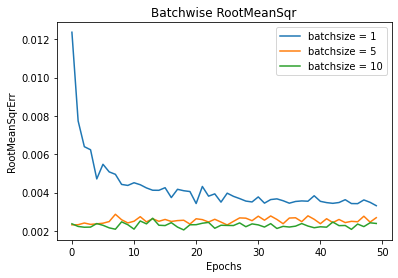

In [0]:
plt.plot(btch1.history['rtmnsqr'])
plt.plot(btch2.history['rtmnsqr'])
plt.plot(btch3.history['rtmnsqr'])
plt.ylabel('RootMeanSqrErr')
plt.xlabel('Epochs')
plt.title('Batchwise RootMeanSqr')
plt.legend(['batchsize = 1','batchsize = 5','batchsize = 10'])
plt.show()

In [0]:
siz = len(x_trnvls)
knvldsz = int(siz*0.2)
kntrnsz = int(siz*0.8)
kntstsz = int(len(closdatadf)*0.2)

In [0]:
xknvld = x_trnvls[:knvldsz]
yknvld = y_trnvls[:knvldsz]
xkntrn = x_trnvls[knvldsz:]
ykntrn = y_trnvls[knvldsz:]

In [0]:
xlen = len(xknvld)
x1knvld = [0]*xlen
for xx in range(0, xlen):
    for xy in range(0, len(xknvld[xx])):
        x1knvld[xx] += xknvld[xx][xy][0]
    x1knvld[xx] /= len(xknvld[xx])
    
y1knvld = yknvld

In [0]:
xlen = len(xkntrn)
x1kntrn = [0]*xlen
nlen = len(xkntrn[0])
for xx in range(xlen):
    for xy in range(nlen):
        x1kntrn[xx] += xkntrn[xx][xy][0]
    x1kntrn[xx] /= len(xkntrn[xx])
    
y1kntrn = ykntrn

In [0]:
xlen = len(x1kntrn)
kntrn = [0]*xlen
for pos in range(xlen):
    kntrn[pos] = [x1kntrn[pos],y1kntrn[pos]]


In [0]:
def euclDist(m, n):
    dist = 0
    dist += (m-n)**2
    dist = dist**(1/2)
    return dist

In [0]:
def knFunc(trnDt, tstVl, x):
    nbrs = []
    for i, trnVal in enumerate(trnDt):
        dist = euclDist(trnVal[:-1], tstVl)
        nbrs.append((dist, i))
        
    sort_nbrs = sorted(nbrs)
    knnbrs = sort_nbrs[:x]
    knvals = [trnDt[x][-1] for dist, x in knnbrs]
    
    tstprds = sum(knvals)/len(knvals)
    return tstprds

In [0]:
kval = [1,3,5,10,25,45,70,85,100]
 
vldknk1 = []
vldknk2 = []
vldknk3 = []
vldknk4 = []
vldknk5 = []
vldknk6 = []
vldknk7 = []
vldknk8 = []
vldknk9 = []

In [0]:
for i in x1knvld:
    vldknk1.append(knFunc(kntrn, i, kval[0]))
    vldknk2.append(knFunc(kntrn, i, kval[1]))
    vldknk3.append(knFunc(kntrn, i, kval[2]))
    vldknk4.append(knFunc(kntrn, i, kval[3]))
    vldknk5.append(knFunc(kntrn, i, kval[4]))
    vldknk6.append(knFunc(kntrn, i, kval[5]))
    vldknk7.append(knFunc(kntrn, i, kval[6]))
    vldknk8.append(knFunc(kntrn, i, kval[7]))
    vldknk9.append(knFunc(kntrn, i, kval[8]))

In [0]:
knvldpredk1 = []
knvldpredk2 = []
knvldpredk3 = []
knvldpredk4 = []
knvldpredk5 = []
knvldpredk6 = []
knvldpredk7 = []
knvldpredk8 = []
knvldpredk9 = []

In [0]:
klen = len(vldknk1)
for x in range(0, klen):
    knvldpredk1.append([vldknk1[x]])
    knvldpredk2.append([vldknk2[x]])
    knvldpredk3.append([vldknk3[x]])
    knvldpredk4.append([vldknk4[x]])
    knvldpredk5.append([vldknk5[x]])
    knvldpredk6.append([vldknk6[x]])
    knvldpredk7.append([vldknk7[x]])
    knvldpredk8.append([vldknk8[x]])
    knvldpredk9.append([vldknk9[x]])

In [0]:
def invrs_func(val):
    return mnmxscl.inverse_transform(val)

In [0]:
knvldpredk1 = invrs_func(knvldpredk1)
knvldpredk2 = invrs_func(knvldpredk2)
knvldpredk3 = invrs_func(knvldpredk3)
knvldpredk4 = invrs_func(knvldpredk4)
knvldpredk5 = invrs_func(knvldpredk5)
knvldpredk6 = invrs_func(knvldpredk6)
knvldpredk7 = invrs_func(knvldpredk7)
knvldpredk8 = invrs_func(knvldpredk8)
knvldpredk9 = invrs_func(knvldpredk9)

In [0]:
knvldact = []
ylen = len(y1knvld)
for pos in range(ylen):
    knvldact.append([y1knvld[pos]])
    
knvldact = invrs_func(knvldact)

In [0]:
rtmnsqrk = []
rtmnsqrk.append(rtmnsqr_func(knvldact,knvldpredk1))
rtmnsqrk.append(rtmnsqr_func(knvldact,knvldpredk2))
rtmnsqrk.append(rtmnsqr_func(knvldact,knvldpredk3))
rtmnsqrk.append(rtmnsqr_func(knvldact,knvldpredk4))
rtmnsqrk.append(rtmnsqr_func(knvldact,knvldpredk5))
rtmnsqrk.append(rtmnsqr_func(knvldact,knvldpredk6))
rtmnsqrk.append(rtmnsqr_func(knvldact,knvldpredk7))
rtmnsqrk.append(rtmnsqr_func(knvldact,knvldpredk8))
rtmnsqrk.append(rtmnsqr_func(knvldact,knvldpredk9))
 
print("\n",
      "The RootMeanSqr when K is 1   : ", rtmnsqrk[0], "\n",
      "The RootMeanSqr when K is 3   : ", rtmnsqrk[1], "\n",
      "The RootMeanSqr when K is 5   : ", rtmnsqrk[2], "\n",
      "The RootMeanSqr when K is 10  : ", rtmnsqrk[3], "\n",
      "The RootMeanSqr when K is 25  : ", rtmnsqrk[4], "\n",
      "The RootMeanSqr when K is 45  : ", rtmnsqrk[5], "\n",
      "The RootMeanSqr when K is 70  : ", rtmnsqrk[6], "\n",
      "The RootMeanSqr when K is 85  : ", rtmnsqrk[7], "\n",
      "The RootMeanSqr when K is 100 : ", rtmnsqrk[8], "\n")


 The RootMeanSqr when K is 1   :  8.091813404590885 
 The RootMeanSqr when K is 3   :  7.6635105310541585 
 The RootMeanSqr when K is 5   :  7.611240004397123 
 The RootMeanSqr when K is 10  :  7.3030005171395365 
 The RootMeanSqr when K is 25  :  7.173773572376358 
 The RootMeanSqr when K is 45  :  7.569517701609523 
 The RootMeanSqr when K is 70  :  8.923810547827925 
 The RootMeanSqr when K is 85  :  9.124853355579267 
 The RootMeanSqr when K is 100 :  9.237658870247246 



Out[46]: [<matplotlib.lines.Line2D at 0x7f6741c2fca0>]

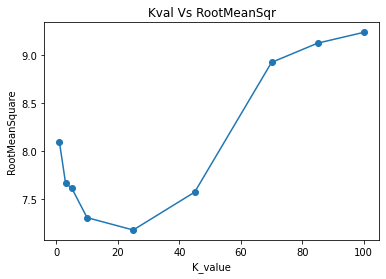

In [0]:
plt.ylabel('RootMeanSquare')
plt.xlabel('K_value')
plt.title('Kval Vs RootMeanSqr')
plt.plot(kval, rtmnsqrk, marker ='o')

In [0]:
xlen = len(x_tstvls)
xkntst = [0]*xlen
nlen = len(x_tstvls[0])
for xx in range(xlen):
    for xy in range(nlen):
        xkntst[xx] += x_tstvls[xx][xy][0]
    xkntst[xx] /= len(x_tstvls[xx])

In [0]:
yknact = closscaled[trndatasize:]
yknact = invrs_func(yknact)

In [0]:
k = 25
ykntst = []
for xx in xkntst:
    ykntst.append(knFunc(kntrn, xx, k))


In [0]:
knpreds = []
ylen = len(ykntst)
for xx in range(ylen):
    knpreds.append([ykntst[xx]])
    
knpreds = invrs_func(knpreds)
 
tmpVal1 = (yknact - knpreds)
tmpVal2 = tmpVal1**2
tmpVal3 = np.mean(tmpVal2)
rtmnsqr_ktst = rtmnsqr_func(yknact, knpreds)
print("RootMeanSquareErr on prediction :", rtmnsqr_ktst)

tmp2 = abs(tmpVal1)
mae_ktst = np.mean(tmp2)
print("MeanAbsoluteErr on prediction    :", mae_ktst)
 
mse_ktst = tmpVal3
print("MeanSquareErr on prediction      :", mse_ktst)

RootMeanSquareErr on prediction : 75.45793603531781
MeanAbsoluteErr on prediction    : 58.589487499870636
MeanSquareErr on prediction      : 5693.900110710115


Out[51]: [<matplotlib.lines.Line2D at 0x7f67505d46d0>]

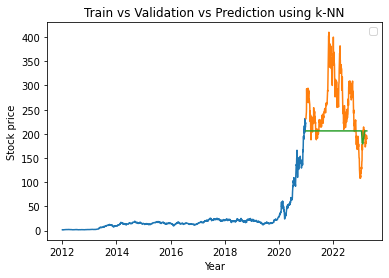

In [0]:
dtvals = datetmp.collect()
closvals = clostmp.collect()
plt.title('Train vs Validation vs Prediction using k-NN')
plt.legend(['Train','Validation','Predictions'])
plt.xlabel('Year')
plt.ylabel('Stock price')
plt.plot(dtvals[:trndatasize], closvals[:trndatasize])
plt.plot(dtvals[trndatasize:],closvals[trndatasize:])
plt.plot(dtvals[trndatasize:],knpreds)